## Segmenting customers into clusters -

### Performing Customer Segmentation on the transactional data to build an efficient marketing model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Segmenting_customers_into_clusters_dataset.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Variables are as follows:-

##### Invoice No: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

##### StockCode: Product / item code, a 5-digit integral number uniquely assigned to each distinct product.

##### Description: Product / item name.

##### Quantity: The quantities of each product / item per transaction.

##### Invoice Date: Invoice Date and time, the day and time when each transaction was generated.

##### UnitPrice: Unit price, Product price per unit in sterling.

##### CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.

##### Country: Country name, the name of the country where each customer resides.

In [5]:
# Exploring our dataset
df.shape

(541909, 8)

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

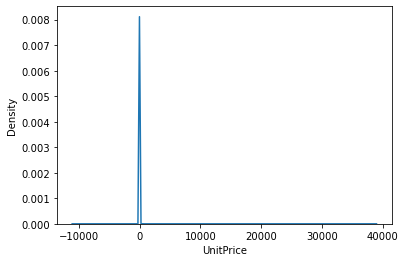

In [8]:
sns.kdeplot(df['UnitPrice'])

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

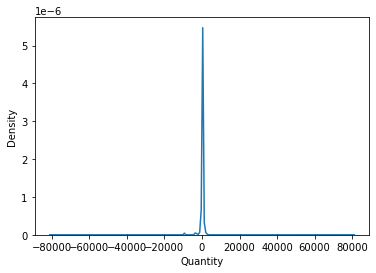

In [9]:
sns.kdeplot(df['Quantity'])

In our dataset, we have outliers present in the data as there are negative values observed from the plot.

In [10]:
def abs_val(value, data):
    for i in value:
        quant1 = data[i].quantile(0.25)
        quant2 = data[i].quantile(0.75)
        IQR = quant2 - quant1
        val_max = quant2 + 1.5*IQR
        data = data.loc[(data[i] > 0) & (data[i] < val_max)]
    return data

In [11]:
item = ['Quantity', 'UnitPrice']
frame = abs_val(item, df)

In [12]:
def clean(value, data):
    plt.figure(figsize = (12,6), dpi=150)
    for j,k in enumerate(value):
        plt.subplot(1, len(value), j+1)
        sns.kdeplot(data[k])


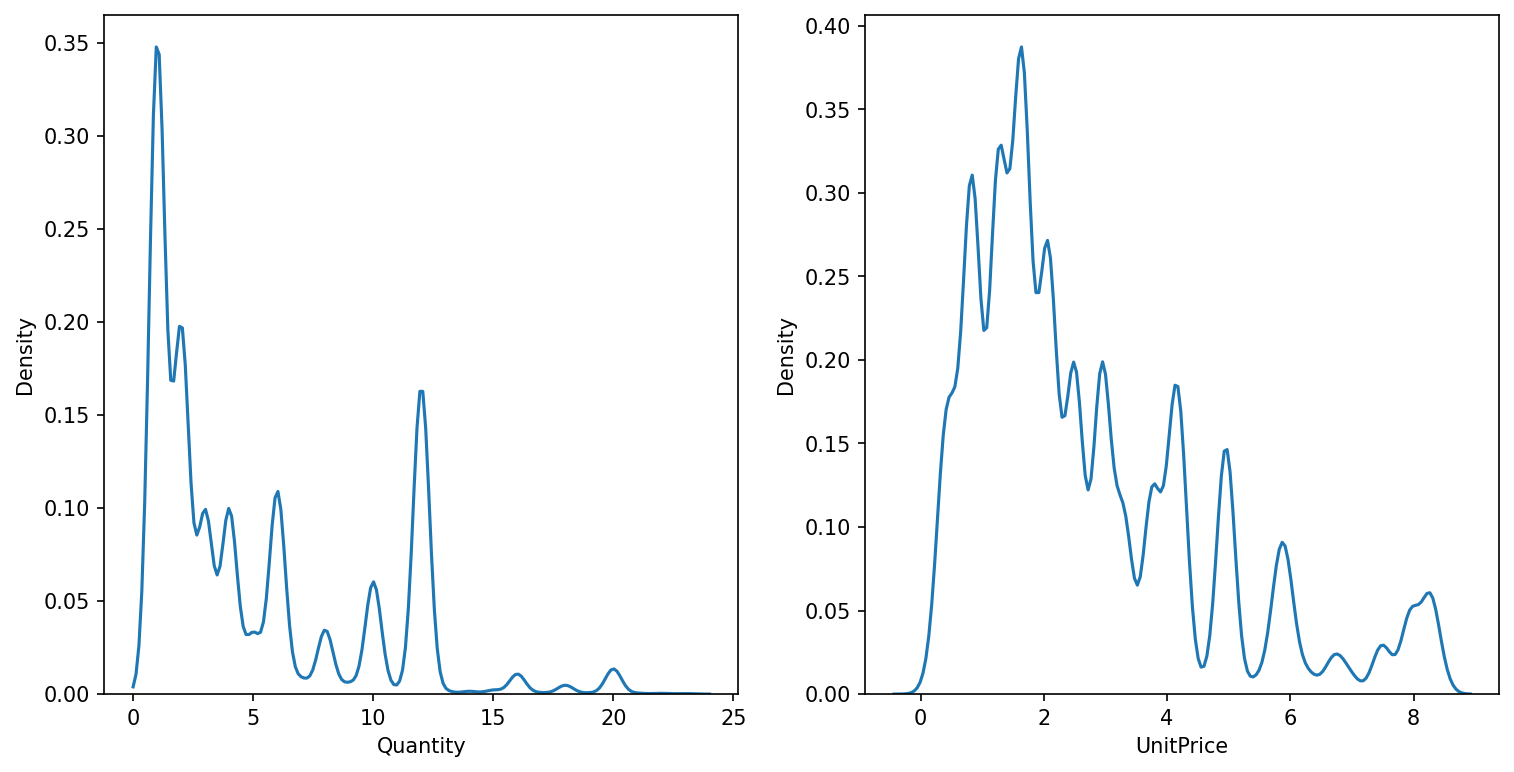

In [13]:
clean(item, frame)

In [14]:
frame.describe()

,Quantity,UnitPrice,CustomerID
count,437169.000000,437169.000000,321030.000000
mean,4.932159,2.712419,15352.180587
std,4.507273,1.944784,1703.612290
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,14049.000000
50%,3.000000,2.080000,15298.000000
75%,8.000000,3.750000,16873.000000
max,23.000000,8.490000,18287.000000


In [15]:
import datetime as dt
frame['Trans_year'] = df['InvoiceDate'].dt.year.astype('category')
frame['Trans_month'] = df['InvoiceDate'].dt.month.astype('category')
frame['Trans_day'] = df['InvoiceDate'].dt.day.astype('category')
frame['Trans_hour'] = df['InvoiceDate'].dt.hour.astype('category')
df['CustomerID'] = df['CustomerID'].astype('category')

In [16]:
df = frame

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Trans_year,Trans_month,Trans_day,Trans_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     116139
Country             0
Trans_year          0
Trans_month         0
Trans_day           0
Trans_hour          0
dtype: int64

In [19]:
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace = True)

In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Trans_year     0
Trans_month    0
Trans_day      0
Trans_hour     0
dtype: int64

We have replaced the missing values of Customer ID by the mode of the feature. Now we will Encode the categorical features of the dataset.

In [24]:
def encode(value):
    for a in value:
        mapped = {}
        obj = list(df[a].unique())
        for m,n in enumerate(obj):
            mapped.update({n:m+1})
        df[a] = df[a].map(mapped)
        df[a] = df[a].astype('int64')

In [25]:
items = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

In [26]:
encode(items)

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Trans_year,Trans_month,Trans_day,Trans_hour
0,1,1,1,6,2010-12-01 08:26:00,2.55,1,1,2010,12,1,8
1,1,2,2,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8
2,1,3,3,8,2010-12-01 08:26:00,2.75,1,1,2010,12,1,8
3,1,4,4,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8
4,1,5,5,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8


In [28]:
df = df.drop(['InvoiceDate'], axis = 1)

In [29]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [30]:
scale_data = scale.fit_transform(df)

In [32]:
scale_data = pd.DataFrame(scale_data, columns = df.columns)
scale_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Trans_year,Trans_month,Trans_day,Trans_hour
0,0.0,-1.139680,-1.152371,0.236915,-0.083515,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674
1,0.0,-1.138779,-1.151482,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674
2,0.0,-1.137878,-1.150593,0.680643,0.019324,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674
3,0.0,-1.136977,-1.149704,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674
4,0.0,-1.136076,-1.148815,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674


### Segmenting the customers into Clusters with K-Means 

In [33]:
from sklearn.cluster import KMeans

In [35]:
distance = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scale_data)
    distance.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Curve')

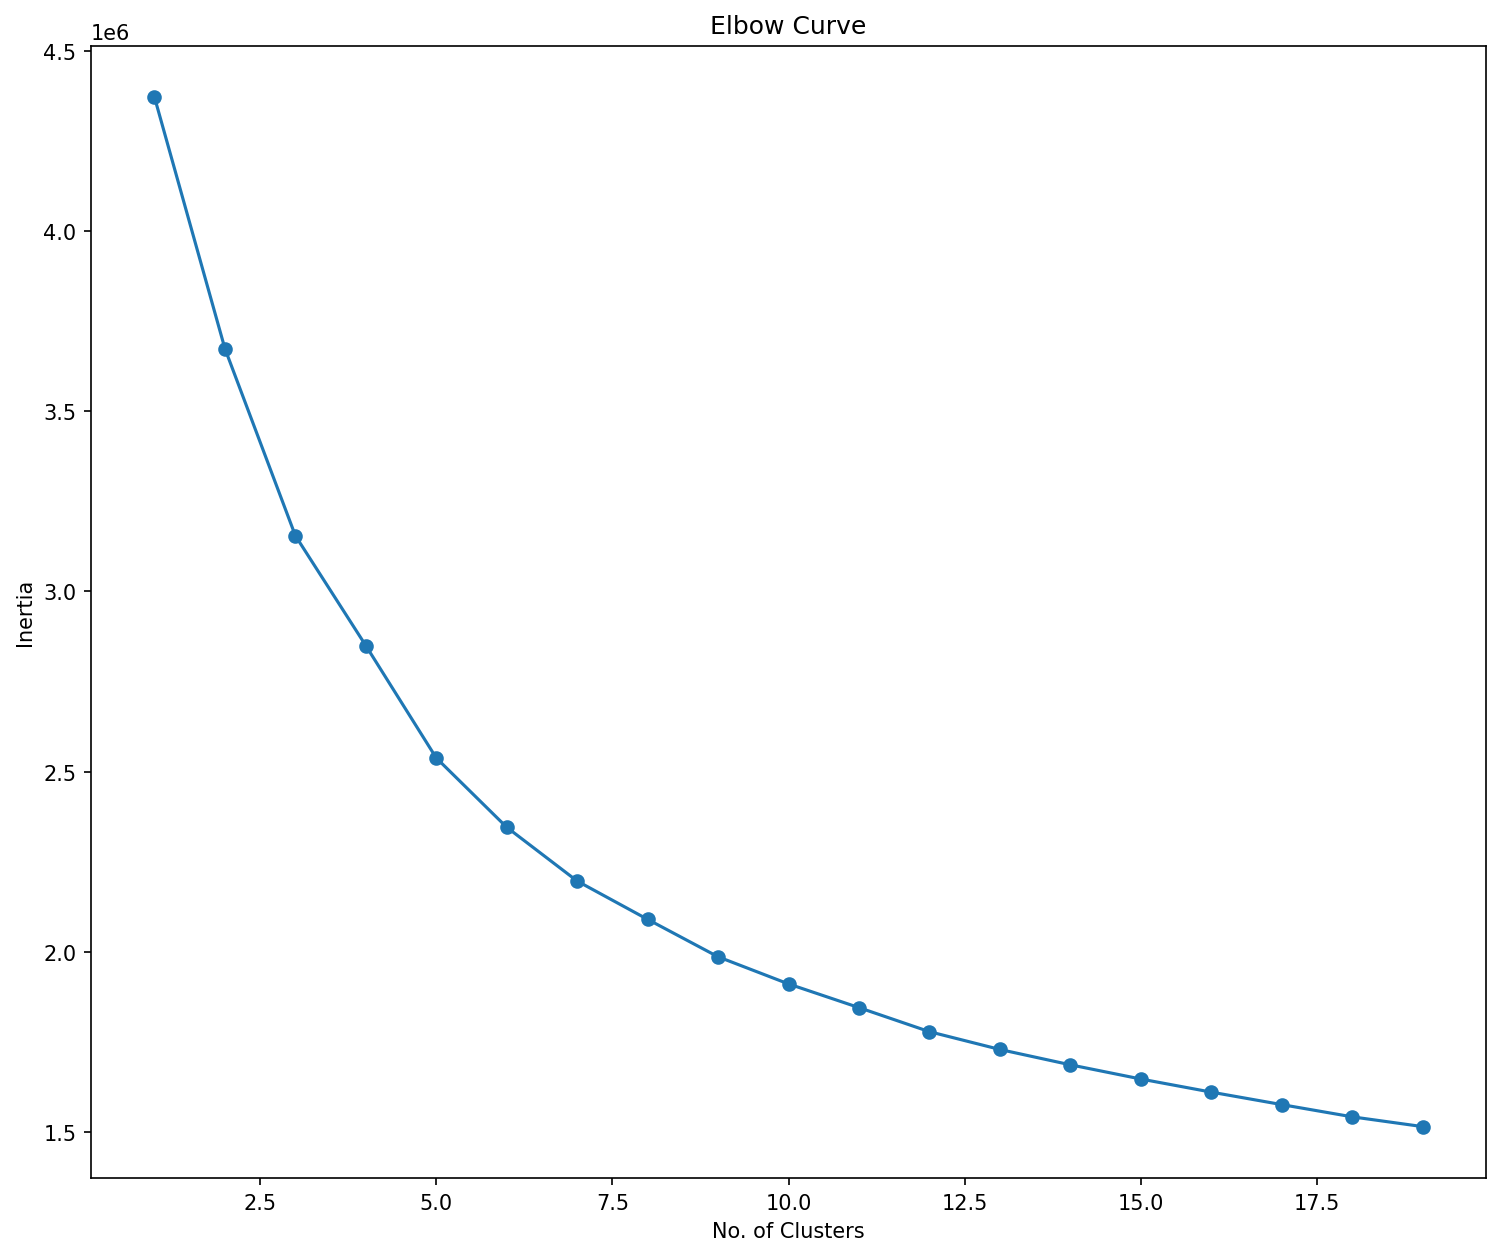

In [36]:
plt.figure(figsize=(12,10),dpi=150)
plt.plot(range(1,20),distance, marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

From the Elbow Curve, it can be observed that after cluster 7 inertia of the remaining clusters is almost constant and hence the number of clusters present in the data can be choosen as 7.

In [37]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(scale_data)
k_pred = kmeans.predict(scale_data)

In [38]:
k_pred

array([4, 4, 4, ..., 5, 5, 5])

In [40]:
scale_data['Cluster_no'] = k_pred

In [41]:
scale_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Trans_year,Trans_month,Trans_day,Trans_hour,Cluster_no
0,0.0,-1.139680,-1.152371,0.236915,-0.083515,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674,4
1,0.0,-1.138779,-1.151482,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674,4
2,0.0,-1.137878,-1.150593,0.680643,0.019324,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674,4
3,0.0,-1.136977,-1.149704,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674,4
4,0.0,-1.136076,-1.148815,0.236915,0.348410,-0.905703,-0.190424,-3.42424,1.254859,-1.616542,-2.13674,4


In [42]:
scale_data['Cluster_no'].value_counts()

6    120488
5     95618
3     68353
2     55950
1     55147
4     34146
0      7467
Name: Cluster_no, dtype: int64

In [56]:
print(kmeans.cluster_centers_)

[[ 0.00000000e+00  2.65964335e-02  2.78644355e-02  6.59217475e-01
   5.54969996e-03  5.48335526e-01  6.63494875e+00  1.88501571e-01
  -1.81997186e-01  1.44936872e-02 -4.32035307e-01]
 [ 0.00000000e+00 -5.34143123e-01 -5.05233035e-01 -1.01289474e-01
  -2.65761983e-01  1.63961212e+00 -1.21526574e-01  2.92035628e-01
   5.95841672e-01  3.97701344e-02  2.98482156e-02]
 [ 0.00000000e+00 -4.14371556e-01 -4.10096508e-01 -5.38554748e-01
   1.62033421e+00 -3.86226776e-01 -1.22897475e-01  2.92035628e-01
  -4.67761206e-01  8.47083275e-02 -2.46670688e-01]
 [ 0.00000000e+00 -4.87913074e-01 -4.63925369e-01  1.44361665e+00
  -5.64948691e-01 -1.19483629e-02 -1.80348918e-02  2.92035628e-01
  -4.65199320e-01  5.33701444e-02 -4.99917614e-01]
 [ 0.00000000e+00 -4.98768369e-01 -5.25752989e-01 -1.70114484e-01
   1.67918014e-01 -7.04513983e-01 -1.33859744e-01 -3.42423973e+00
   1.25485859e+00 -5.75130670e-01  1.00602947e-02]
 [ 0.00000000e+00  1.58374204e+00  1.55190197e+00  5.24522697e-02
  -9.67132036e-03  

Text(0.5, 1.0, 'Count plot of Clusters')

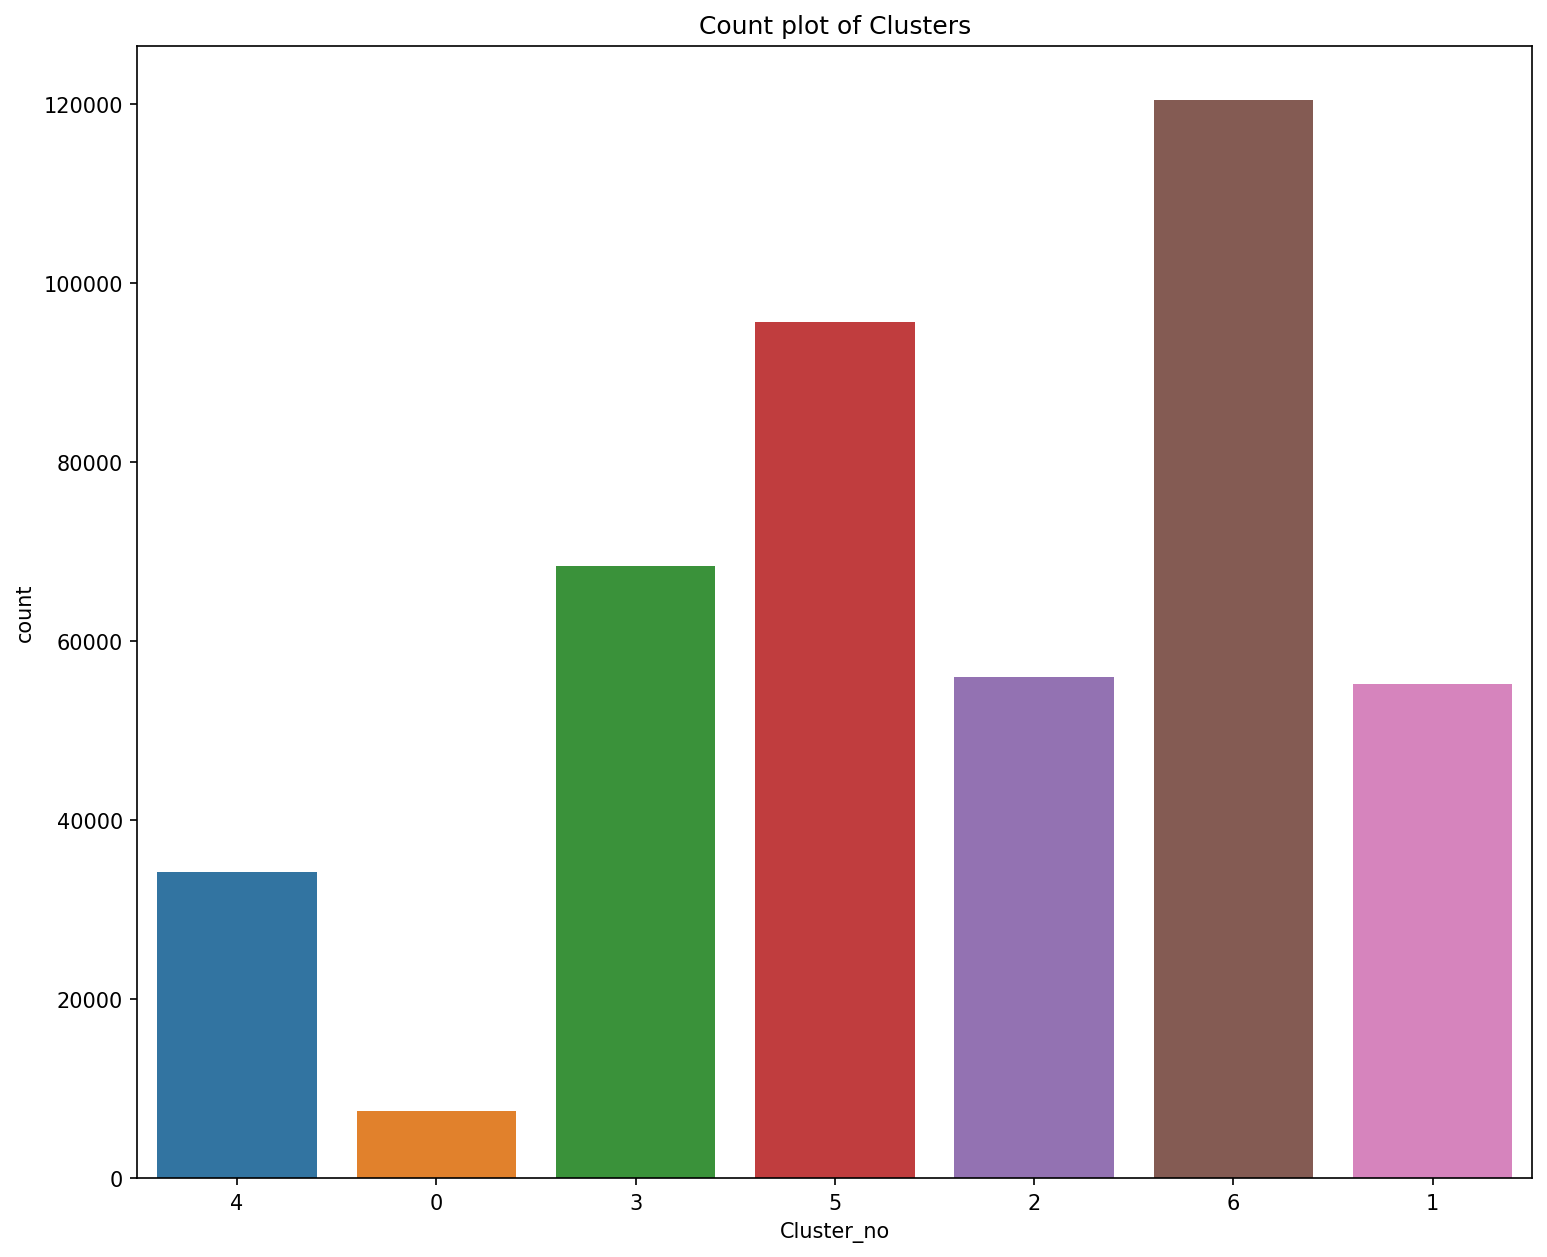

In [66]:
plt.figure(figsize = (12,10), dpi=150)
sns.countplot(scale_data['Cluster_no'])
plt.title('Count plot of Clusters')

As we can see the above plot describes the number of datapoints present in each of the clusters.